# 2. Using `ImagePipeline`s to process batches

---

In this tutorial, we'll introduce how to use widgets to tune pipeline parameters, and process images at scale.

Note:
- We'll also be using the same data in {doc}`GrowthCurves`.

In [1]:
import phenotypic as pht

filepaths = [x for x in
             pht.data.yield_sample_dataset(mode='filepath')]
# This returns the relative filepaths for this sample data
# While unconventional for a loader, this is done to demonstrate importing an directory of images.
filepaths


[PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/2_1S_5.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/2_1S_6.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/2_1S_7.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/2_1S_8.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/3_1S_5.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/3_1S_6.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/3_1S_7.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/3_1S_8.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/4_1S_5.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/4_1S_6.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/4_1S_7.jpg'),
 PosixPath('../../../../../src/phenotypic/data/PhenoTypicSampleSubset/4_1S_8

## Processing your first image

---
Here we're gonna import the last image in the dataset, since its from the last timepoint and should have reasonable growth. Accepted file formats are jpegs, tiffs, pngs, and RAW files.

**Important things to note:**
 - `bit_depth` will have an important role in memory usage and accuracy. For jpegs, this will always be 8. For other image formats, consult your camera documentation for information. You may also find this information in your image metadata, depending on the format. PhenoTypic supports bit depths of 8 and 16. If not provided, PhenoTypic will try to guess this information from the imported image data.

In [2]:
# We're gonna import the last image in the dataset, lets make an image with a grid in 96 array format
# Accepted filepaths are jpegs, tiffs, pngs, and RAW format files
# These images are jpegs so we set a bit depth of 8.
image = pht.GridImage.imread(filepaths[-2], nrows=8, ncols=12, bit_depth=8)



Let's then view the image. PhenoTypic uses matplotlib as the backend for compatibility, which allows for streamlined prototyping in Jupyter. All plotting methods return (plt.Figure, plt.Axes) for easy post-plotting editing. You can also plot directly to an axes. There's a few different ways to view your image and its internal states.

1. View the input image
``` python
Image.show() # Shows the input image
fig, ax = Image.show() # If you need the figure or axes for further processing
fig.show()
```

2. Viewing specific components
```python
rgb_fig, rgb_ax = Image.rgb.show() # Shows the rgb array if its available
gray_fig, gray_ax = Image.gray.show() # Shows the grayscale array.
```
Also available for other image components such as `enh_gray`, `objmask`, `objmap`, ...

3. Viewing overlay information
```python
overlay_fig, overlay_ax = Image.show_overlay()
overlay_fig.show()
```

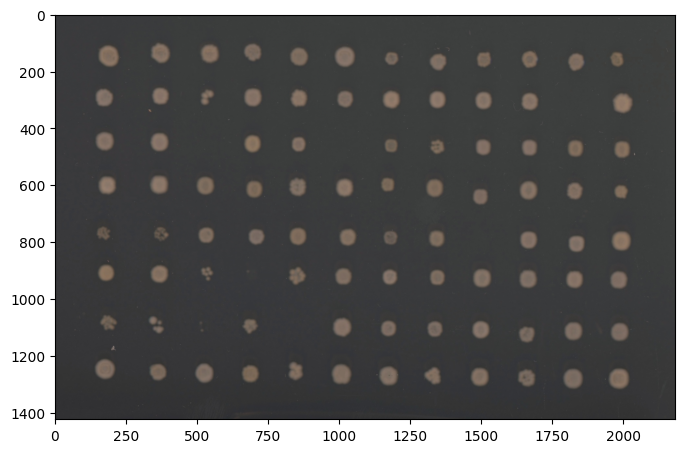

In [3]:
fig, ax = image.show()

You can always visualize your image with `Image.show()`. This returns a matplotlib figure and axes object, but should plot the figures inside a jupyter notebook. The axis labels are the pixel rows and columns that show the size of your photo. If your original input is rgb or grayscale, `Image.show()` will return the original image. To show the grayscale converted version of your image, use `Image.gray.show()`.

## HeavyGitterPipeline

For ease of use, PhenoTypic supplies built-in pipelines that we have curated for different projects we use internally. Here's a demo of the `HeavyGitterPipeline`.

The HeavyWatershedPipeline consists of the following operations:
1. `BM3DDenoise`
2. `CLAHE`
3. `MedianFilter`
4. `GitterDetector`
5. `MaskOpener`
6. `BorderObjectRemover`
7. `SmallObjectRemover`
8. `MaskFill`
9. `GridOversizedObjectRemover`
10. `MinResidualRemover`
11. `GridAligner`
12. `GitterDetector` (second pass since alignment might improve detection)
13. `MaskOpener`
14. `BorderObjectRemover`
15. `SmallObjectRemover`
16. `MaskFill`
17. `MinResidualReducer`

It also has the following measurements:
- `MeasureShape`
- `MeasureIntensity`
- `MeasureTexture`
- `MeasureColor`

You can apply `ImagePipeline` and `ImageOperation` in place or make a new copy for comparison.

```python
# return a copy
new_image = pipe.apply(image)

# in place
pipe.apply(image, inplace=True)
```

In [4]:
from phenotypic.prefab import HeavyGitterPipeline

pipe = HeavyGitterPipeline()
pipe.widget(image)

In [7]:
from phenotypic.prefab import HeavyWatershedPipeline

pipe2 = HeavyWatershedPipeline()
pipe2.widget(image)

To tune the parameters you can use the widget method that comes with every `ImageOperation` and `ImagePipeline`. This lets you visually interact with the parameters of the class. Pressing the `Update View` button will update the parameters and let you preview their effects on the image supplied as an argument to the method.

```python
pipe.widget(image)
```

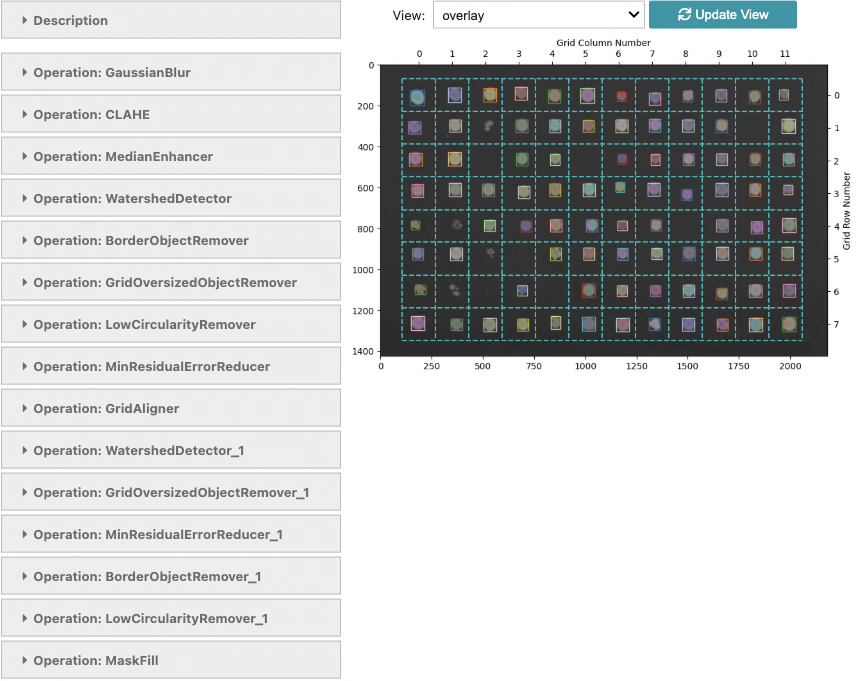

<div class="alert alert-info">

**📝 Note: Interactive widgets in documentation**

When viewing this tutorial as static HTML documentation, widgets will appear as images. For full interactivity, run this notebook in Jupyter Notebook or JupyterLab.

</div>

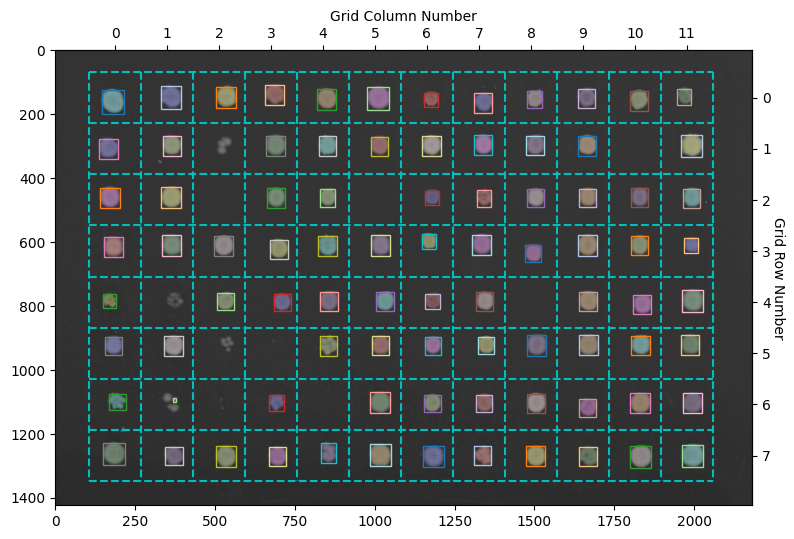

In [5]:
pipe.apply(image, inplace=True)

fig, ax = image.show_overlay()  # returns a figure and axes

Here the objects with a colored overlay over them represent the different objects detected in your image. The boxes show the objects belonging to a specific grid section. The `HeavyWatershedPipeline` takes steps to ensure only one object in each section remains for downstream analysis. In reality, more objects were probably detected, but the refinement steps removed them according tos trict filters

In [6]:
meas = pipe.measure(image)
meas.head()


,Metadata_FileSuffix,Metadata_BitDepth,Metadata_ImageType,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,.jpg,8,GridImage,6_1S_7,1,139.576551,686.713517,110,657,172,...,0.309804,0.435294,0.448946,0.462745,0.478431,0.498039,0.043166,0.096185,5.538571,5.791290
1,.jpg,8,GridImage,6_1S_7,2,148.151559,362.125000,113,331,184,...,0.313725,0.454902,0.477968,0.498039,0.517647,0.545098,0.052580,0.110040,6.499312,6.811936
2,.jpg,8,GridImage,6_1S_7,3,147.168975,535.913820,115,505,180,...,0.317647,0.443137,0.479812,0.505882,0.521569,0.552941,0.058114,0.121155,7.063123,7.547446
3,.jpg,8,GridImage,6_1S_7,4,150.986417,1011.233214,116,977,187,...,0.313725,0.462745,0.481581,0.501961,0.517647,0.537255,0.051533,0.107035,5.642369,5.792222
4,.jpg,8,GridImage,6_1S_7,5,145.111368,1969.141950,120,1947,171,...,0.321569,0.419608,0.439005,0.447059,0.466667,0.517647,0.041147,0.093781,8.118938,8.275674


## Saving your pipeline

```python
pipe.to_json("MyPipeline.json")
```

## Processing lots of images

### Method 1. Looping through images

```python
import pandas as pd
from tqdm import tqdm

batch_meas = []

# We use tqdm as a counter
# We only process 3 images for this demo
for image_path in tqdm(filepaths[:2], desc="Images", total=2):
    curr_image = pht.GridImage.imread(image_path, nrows=8, ncols=12)

    # This applies the operations and measurements at the same time
    curr_meas = pipe.apply_and_measure(curr_image, inplace=True)
    batch_meas.append(curr_meas)

batch_meas = pd.concat(batch_meas, axis=0)
```
### Method 2: Joblib parallel execution


```python
from typing import Iterator
import pandas as pd
from joblib import Parallel, delayed


# We use a generator function to prevent loading too many images into memory
def image_iterator() -> Iterator[pht.GridImage]:
    for image_path in tqdm(filepaths[:], desc="Processing Images", total=len(filepaths)):
        yield pht.GridImage.imread(image_path, nrows=8, ncols=12)


batch_meas = Parallel(n_jobs=-1)(
        delayed(pipe.apply_and_measure)(image, inplace=False, reset=True)
        for image in image_iterator()
)

batch_meas = pd.concat(batch_meas, axis=0)
batch_meas.head()
```

**Roadmap Update:** PhenoTypic has plans to incorporate native parallelization and processing to make this more intuitive in the future!

### Method 3: Using the CLI script
You can download the phenotypic-cli.py script from the downloadables tab and run it in parallel with the following command:

```bash
uv run phenotypic-cli.py my_pipeline.json path/to/raw_images path/to/output_dir --n-jobs 4
```

```bash
uv run phenotypic-cli.py <pipeline_file> <image_directory> <output_dir> --n-jobs <number cores>
```